In [2]:
#imports
from Api import *
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from pyproj import Proj, transform
conda install -c conda-forge dash-bootstrap-components
import dash_bootstrap_components

# convert easting and northing to latitude and longitude for use in plotly maps in app

v84 = Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = Proj(proj="latlong", k=0.9996012717, ellps="airy",
        towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = Proj(init="world:bng")


def ENtoLL84(easting, northing):
    """Returns (longitude, latitude) tuple
    """
    vlon36, vlat36 = vgrid(easting, northing, inverse=True)
    return transform(v36, v84, vlon36, vlat36)

C:\Users\Rajan\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rajan\anaconda3\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


In [3]:
#dictionaries (list of multiple dictionaries)
list1 = getMeasurements({'area': '3-35', 'samplingPointType': 'F6', '_limit': '10000'})
list2= getMeasurements({'area': '3-35', 'samplingPointType': 'FA', '_limit': '10000'})
list3= getMeasurements({'area': '3-35', 'samplingPointType': 'BB', '_limit': '10000'})

#extract and replace determinand items from dictionaries

for i in list1:
    i['Determinand'] = i['determinand']['definition']
    i['Water Type'] = i['sample']['sampledMaterialType']['label']
    i['Easting'] = i['sample']['samplingPoint']['easting']
    i['Northing'] = i['sample']['samplingPoint']['northing']
    i['Date and Time'] = i['sample']['sampleDateTime']
    i['Location'] = i['sample']['samplingPoint']['label']
    i['LongLat'] = (ENtoLL84(i['Easting'],i['Northing']))
    i.pop('determinand')
    i.pop('@id')
    if 'resultQualifier' in i:
        i.pop('resultQualifier')
    i.pop('sample')

   
    
for i in list2:
    i['Determinand'] = i['determinand']['definition']
    i['Water Type'] = i['sample']['sampledMaterialType']['label']
    i['Easting'] = i['sample']['samplingPoint']['easting']
    i['Northing'] = i['sample']['samplingPoint']['northing']
    i['Date and Time'] = i['sample']['sampleDateTime']
    i['Location'] = i['sample']['samplingPoint']['label']
    i['LongLat'] = (ENtoLL84(i['Easting'],i['Northing']))
    i.pop('determinand')
    i.pop('@id')
    if 'resultQualifier' in i:
        i.pop('resultQualifier')
    i.pop('sample')

for i in list3:
    i['Determinand'] = i['determinand']['definition']
    i['Water Type'] = i['sample']['sampledMaterialType']['label']
    i['Easting'] = i['sample']['samplingPoint']['easting']
    i['Northing'] = i['sample']['samplingPoint']['northing']
    i['Date and Time'] = i['sample']['sampleDateTime']
    i['Location'] = i['sample']['samplingPoint']['label']
    i['LongLat'] = (ENtoLL84(i['Easting'],i['Northing']))
    i.pop('determinand')
    i.pop('@id')
    if 'resultQualifier' in i:
        i.pop('resultQualifier')
    i.pop('sample')





#dataframes
df1 = pd.DataFrame(data=list1)
#res_list_en = convert_lonlat(df1['Easting'], df1['Northing'])

df2 = pd.DataFrame(data=list2)
df3 = pd.DataFrame(data=list3)

frames = [df1, df2, df3]

result = pd.concat(frames)
result



<ipython-input-2-fc223154cb3f>:24: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return transform(v36, v84, vlon36, vlat36)


,result,Determinand,Water Type,Easting,Northing,Date and Time,Location,LongLat
0,5.1200,"Solids, Suspended at 105 C",RIVER / RUNNING SURFACE WATER,390002,642395,2015-05-19T09:30:00,TILL @ HEATON MILL,"(-2.160534365357642, 55.674945826365814)"
1,0.3800,"Nitrogen, Organic as N",RIVER / RUNNING SURFACE WATER,390002,642395,2015-05-19T09:30:00,TILL @ HEATON MILL,"(-2.160534365357642, 55.674945826365814)"
2,0.0300,Ammoniacal Nitrogen as N,RIVER / RUNNING SURFACE WATER,390002,642395,2015-05-19T09:30:00,TILL @ HEATON MILL,"(-2.160534365357642, 55.674945826365814)"
3,0.0288,Phosphate :- {TIP},RIVER / RUNNING SURFACE WATER,390002,642395,2015-05-19T09:30:00,TILL @ HEATON MILL,"(-2.160534365357642, 55.674945826365814)"
4,11.2000,Temperature of Water,RIVER / RUNNING SURFACE WATER,390002,642395,2015-05-19T09:30:00,TILL @ HEATON MILL,"(-2.160534365357642, 55.674945826365814)"
...,...,...,...,...,...,...,...,...
5105,0.2000,Hydrocarbon Oils,GROUNDWATER,393426,590644,2014-02-04T11:14:00,BLAXTER COTTAGES SPRING SUPPLY FROM TAP,"(-2.1048488681147792, 55.20999732573828)"
5106,4.2300,"Solids, Suspended at 105 C",GROUNDWATER,393426,590644,2014-03-13T08:43:00,BLAXTER COTTAGES SPRING SUPPLY FROM TAP,"(-2.1048488681147792, 55.20999732573828)"
5107,0.2000,Hydrocarbon Oils,GROUNDWATER,393426,590644,2014-03-13T08:43:00,BLAXTER COTTAGES SPRING SUPPLY FROM TAP,"(-2.1048488681147792, 55.20999732573828)"
5108,0.2000,Hydrocarbon Oils,GROUNDWATER,393426,590644,2014-04-03T11:33:00,BLAXTER COTTAGES SPRING SUPPLY FROM TAP,"(-2.1048488681147792, 55.20999732573828)"


In [6]:
#Extract year, month, latitude and longitude as variables that can be used in analysis and mapping

result['Year'] = result["Date and Time"].str[:4]
result['Year'] = result['Year'].astype(int)
result['Month'] = result["Date and Time"].str[5:7]
result['Month'] = result['Month'].astype(int)
result['Longitude'] = (result['LongLat'].str[0])
result['Latitude'] = result['LongLat'].str[1]
result['Date'] = result ['Date and Time'].str[:7]
result['Date'] = result['Date']


result

,result,Determinand,Water Type,Easting,Northing,Date and Time,Location,LongLat,Year,Month,Longitude,Latitude,Date
0,5.1200,"Solids, Suspended at 105 C",RIVER / RUNNING SURFACE WATER,390002,642395,2015-05-19T09:30:00,TILL @ HEATON MILL,"(-2.160534365357642, 55.674945826365814)",2015,5,-2.160534,55.674946,2015-05
1,0.3800,"Nitrogen, Organic as N",RIVER / RUNNING SURFACE WATER,390002,642395,2015-05-19T09:30:00,TILL @ HEATON MILL,"(-2.160534365357642, 55.674945826365814)",2015,5,-2.160534,55.674946,2015-05
2,0.0300,Ammoniacal Nitrogen as N,RIVER / RUNNING SURFACE WATER,390002,642395,2015-05-19T09:30:00,TILL @ HEATON MILL,"(-2.160534365357642, 55.674945826365814)",2015,5,-2.160534,55.674946,2015-05
3,0.0288,Phosphate :- {TIP},RIVER / RUNNING SURFACE WATER,390002,642395,2015-05-19T09:30:00,TILL @ HEATON MILL,"(-2.160534365357642, 55.674945826365814)",2015,5,-2.160534,55.674946,2015-05
4,11.2000,Temperature of Water,RIVER / RUNNING SURFACE WATER,390002,642395,2015-05-19T09:30:00,TILL @ HEATON MILL,"(-2.160534365357642, 55.674945826365814)",2015,5,-2.160534,55.674946,2015-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.2000,Hydrocarbon Oils,GROUNDWATER,393426,590644,2014-02-04T11:14:00,BLAXTER COTTAGES SPRING SUPPLY FROM TAP,"(-2.1048488681147792, 55.20999732573828)",2014,2,-2.104849,55.209997,2014-02
5106,4.2300,"Solids, Suspended at 105 C",GROUNDWATER,393426,590644,2014-03-13T08:43:00,BLAXTER COTTAGES SPRING SUPPLY FROM TAP,"(-2.1048488681147792, 55.20999732573828)",2014,3,-2.104849,55.209997,2014-03
5107,0.2000,Hydrocarbon Oils,GROUNDWATER,393426,590644,2014-03-13T08:43:00,BLAXTER COTTAGES SPRING SUPPLY FROM TAP,"(-2.1048488681147792, 55.20999732573828)",2014,3,-2.104849,55.209997,2014-03
5108,0.2000,Hydrocarbon Oils,GROUNDWATER,393426,590644,2014-04-03T11:33:00,BLAXTER COTTAGES SPRING SUPPLY FROM TAP,"(-2.1048488681147792, 55.20999732573828)",2014,4,-2.104849,55.209997,2014-04


In [28]:
import dash_bootstrap_components

In [30]:
conda install -c conda-forge dash-bootstrap-components

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [80]:
#export DataFrame to CSV file
result.to_csv(r'C:\Users\Rajan\documents/masters/app/coordinatedataset.csv')

In [7]:
data = result
#data["determinand.label"].unique()
#Remodel the dataset to group out every label and include their respective value by time and location
raw_df = data.pivot_table(index=["Water Type",'Date',"Year",'Month', "Location", "Latitude", "Longitude"], columns=["Determinand"], values="result").fillna(0)
#, "Latitude", "Longitude"
raw_df
#raw_df.to_csv(r'C:\Users\Rajan\documents/masters/app/appdata1.csv')

Determinand                                                                               1,1,1,2-Tetrachloroethane  \
Water Type                    Date    Year Month Location            Latitude  Longitude                              
GROUNDWATER                   2004-03 2004 3     1/22/05/68 DOE HILL 55.221358 -1.808043                        0.0   
                              2007-10 2007 10    HURY FARM           54.579332 -2.060768                        0.0   
                              2009-01 2009 1     HURY FARM           54.579332 -2.060768                        0.1   
                              2009-02 2009 2     HURY FARM           54.579332 -2.060768                        0.0   
                              2009-11 2009 11    HURY FARM           54.579332 -2.060768                        0.1   
...                                                                                                             ...   
RIVER / RUNNING SURFACE WATER 2022-04 2022 4     TILL @ HEATON MILL  55.674946 -2.160534                        0.0   
                              2022-05 2022 5     TILL @ HEATON MILL  55.674946 -2.160534                        0.0   
                              2022-06 2022 6     TILL @ HEATON MILL  55.674946 -2.160534                        0.0   
                              2022-07 2022 7     TILL @ HEATON MILL  55.674946 -2.160534                        0.0   
                              2022-08 2022 8     TILL @ HEATON MILL  55.674946 -2.160534                        0.0   

Determinand                                                                               1,1,1-Trichloroethane  \
Water Type                    Date    Year Month Location            Latitude  Longitude                          
GROUNDWATER                   2004-03 2004 3     1/22/05/68 DOE HILL 55.221358 -1.808043                    0.2   
                              2007-10 2007 10    HURY FARM           54.579332 -2.060768                    0.0   
                              2009-01 2009 1     HURY FARM           54.579332 -2.060768                    0.1   
                              2009-02 2009 2     HURY FARM           54.579332 -2.060768                    0.0   
                              2009-11 2009 11    HURY FARM           54.579332 -2.060768                    0.1   
...                                                                                                         ...   
RIVER / RUNNING SURFACE WATER 2022-04 2022 4     TILL @ HEATON MILL  55.674946 -2.160534                    0.0   
                              2022-05 2022 5     TILL @ HEATON MILL  55.674946 -2.160534                    0.0   
                              2022-06 2022 6     TILL @ HEATON MILL  55.674946 -2.160534                    0.0   
                              2022-07 2022 7     TILL @ HEATON MILL  55.674946 -2.160534                    0.0   
                              2022-08 2022 8     TILL @ HEATON MILL  55.674946 -2.160534                    0.0   

Determinand                                                                               1,1,2,2-Tetrachloroethane  \
Water Type                    Date    Year Month Location            Latitude  Longitude                              
GROUNDWATER                   2004-03 2004 3     1/22/05/68 DOE HILL 55.221358 -1.808043                        0.0   
                              2007-10 2007 10    HURY FARM           54.579332 -2.060768                        0.0   
                              2009-01 2009 1     HURY FARM           54.579332 -2.060768                        0.5   
                              2009-02 2009 2     HURY FARM           54.579332 -2.060768                        0.0   
                              2009-11 2009 11    HURY FARM           54.579332 -2.060768                        0.5   
...                                                                                                             ...   
RIVE

In [8]:
dooc = raw_df['Carbon, Organic, Dissolved as C :- {DOC}']
pH = raw_df['pH']
nitrate = raw_df['Nitrate as N']
o2 = raw_df['Oxygen, Dissolved as O2']


In [10]:
concat = pd.concat([dooc,pH, nitrate,o2], axis=1)
#concat
#concat.to_csv(r'C:\Users\Rajan\documents/masters/app/variablesdata1.csv')

count    689.000000
mean       3.885658
std        3.868961
min        0.000000
25%        0.000000
50%        6.300000
75%        7.730000
max        9.240000
Name: pH, dtype: float64

In [21]:
concat['text'] = 'Dissolved Organic Carbon Content = ' + '' + concat['Carbon, Organic, Dissolved as C :- {DOC}'].astype(str) + '          ' + ' , pH = '+ '          '+ concat['pH'].astype(str) +'          '+ ' , Nitrate as N = ' + concat['Nitrate as N'].astype(str) +'          '+ ' , Dissolved Oxygen as O2 = ' + concat['Oxygen, Dissolved as O2'].astype(str)
concat
concat.to_csv(r'C:\Users\Rajan\documents/masters/app/variablesdataapp.csv')

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [                                                                                          Carbon, Organic, Dissolved as C :- {DOC}  \
Water Type                    Date    Year Month Location            Latitude  Longitude                                             
GROUNDWATER                   2004-03 2004 3     1/22/05/68 DOE HILL 55.221358 -1.808043                                      0.00   
                              2007-10 2007 10    HURY FARM           54.579332 -2.060768                                      1.81   
                              2009-01 2009 1     HURY FARM           54.579332 -2.060768                                      1.97   
                              2009-02 2009 2     HURY FARM           54.579332 -2.060768                                      1.13   
                              2009-11 2009 11    HURY FARM           54.579332 -2.060768                                      3.52   
...                                                                                                                            ...   
RIVER / RUNNING SURFACE WATER 2022-04 2022 4     TILL @ HEATON MILL  55.674946 -2.160534                                      0.00   
                              2022-05 2022 5     TILL @ HEATON MILL  55.674946 -2.160534                                      0.00   
                              2022-06 2022 6     TILL @ HEATON MILL  55.674946 -2.160534                                      0.00   
                              2022-07 2022 7     TILL @ HEATON MILL  55.674946 -2.160534                                      0.00   
                              2022-08 2022 8     TILL @ HEATON MILL  55.674946 -2.160534                                      0.00   

                                                                                           pH  \
Water Type                    Date    Year Month Location            Latitude  Longitude        
GROUNDWATER                   2004-03 2004 3     1/22/05/68 DOE HILL 55.221358 -1.808043  7.7   
                              2007-10 2007 10    HURY FARM           54.579332 -2.060768  0.0   
                              2009-01 2009 1     HURY FARM           54.579332 -2.060768  0.0   
                              2009-02 2009 2     HURY FARM           54.579332 -2.060768  0.0   
                              2009-11 2009 11    HURY FARM           54.579332 -2.060768  0.0   
...                                                                                       ...   
RIVER / RUNNING SURFACE WATER 2022-04 2022 4     TILL @ HEATON MILL  55.674946 -2.160534  0.0   
                              2022-05 2022 5     TILL @ HEATON MILL  55.674946 -2.160534  0.0   
                              2022-06 2022 6     TILL @ HEATON MILL  55.674946 -2.160534  0.0   
                              2022-07 2022 7     TILL @ HEATON MILL  55.674946 -2.160534  0.0   
                              2022-08 2022 8     TILL @ HEATON MILL  55.674946 -2.160534  0.0   

                                                                                          Nitrate as N  \
Water Type                    Date    Year Month Location            Latitude  Longitude                 
GROUNDWATER                   2004-03 2004 3     1/22/05/68 DOE HILL 55.221358 -1.808043      4.290000   
                              2007-10 2007 10    HURY FARM           54.579332 -2.060768      4.000000   
                              2009-01 2009 1     HURY FARM           54.579332 -2.060768      5.150000   
                              2009-02 2009 2     HURY FARM           54.579332 -2.060768      4.950000   
                              2009-11 2009 11    HURY FARM           54.579332 -2.060768      5.550000   
...                                                                                                ...   
RIVER / RUNNING SURFACE WATER 2022-04 2022 4     TILL @ HEATON MILL  55.674946 -2.160534      1.917500   
                              2022-05 2022 5     TILL @ HEATON MILL  55.674946 -2.160534      1.556667   
                              2022-06 2022 6     TILL @ HEATON MILL  55.674946 -2.160534      1.656667   
                              2022-07 2022 7     TILL @ HEATON MILL  55.674946 -2.160534      1.565000   
                              2022-08 2022 8     TILL @ HEATON MILL  55.674946 -2.160534      1.490000   

                                                                                          Oxygen, Dissolved as O2  \
Water Type                    Date    Year Month Location            Latitude  Longitude                            
GROUNDWATER                   2004-03 2004 3     1/22/05/68 DOE HILL 55.221358 -1.808043                     8.67   
                              2007-10 2007 10    HURY FARM           54.579332 -2.060768                     0.00   
                              2009-01 2009 1     HURY FARM           54.579332 -2.060768                    11.90   
                              2009-02 2009 2     HURY FARM           54.579332 -2.060768                     8.24   
                              2009-11 2009 11    HURY FARM           54.579332 -2.060768                    11.90   
...                                                                                                           ...   
RIVER / RUNNING SURFACE WATER 2022-04 2022 4     TILL @ HEATON MILL  55.674946 -2.160534                     0.00   
                              2022-05 2022 5     TILL @ HEATON MILL  55.674946 -2.160534                     0.00   
                              2022-06 2022 6     TILL @ HEATON MILL  55.674946 -2.160534                     0.00   
                              2022-07 2022 7     TILL @ HEATON MILL  55.674946 -2.160534                     0.00   
                              2022-08 2022 8     TILL @ HEATON MILL  55.674946 -2.160534                     0.00   

                                                                                                                                       text  
Water Type                    Date    Year Month Location            Latitude  Longitude                                                     
GROUNDWATER                   2004-03 2004 3     1/22/05/68 DOE HILL 55.221358 -1.808043  Dissolved Organic Carbon Content = 0.0        ...  
                              2007-10 2007 10    HURY FARM           54.579332 -2.060768  Dissolved Organic Carbon Content = 1.81       ...  
                              2009-01 2009 1     HURY FARM           54.579332 -2.060768  Dissolved Organic Carbon Content = 1.97       ...  
                              2009-02 2009 2     HURY FARM           54.579332 -2.060768  Dissolved Organic Carbon Content = 1.13       ...  
                              2009-11 2009 11    HURY FARM           54.579332 -2.060768  Dissolved Organic Carbon Content = 3.52       ...  
...                                                                                                                                     ...  
RIVER / RUNNING SURFACE WATER 2022-04 2022 4     TILL @ HEATON MILL  55.674946 -2.160534  Dissolved Organic Carbon Content = 0.0        ...  
                              2022-05 2022 5     TILL @ HEATON MILL  55.674946 -2.160534  Dissolved Organic Carbon Content = 0.0        ...  
                              2022-06 2022 6     TILL @ HEATON MILL  55.674946 -2.160534  Dissolved Organic Carbon Content = 0.0        ...  
                              2022-07 2022 7     TILL @ HEATON MILL  55.674946 -2.160534  Dissolved Organic Carbon Content = 0.0        ...  
                              2022-08 2022 8     TILL @ HEATON MILL  55.674946 -2.160534  Dissolved Organic Carbon Content = 0.0        ...  

[689 rows x 5 columns]]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [15]:
df = concat.reset_index()
month = int(input('Month number ='))
year = int(input('Year = '))
df2009 = df.loc[df['Year'] == year]
df2009month = df2009.loc[df2009['Month'] == month]
df2009month

Month number =5
Year = 2009


,Water Type,Date,Year,Month,Location,Latitude,Longitude,"Carbon, Organic, Dissolved as C :- {DOC}",pH,Nitrate as N,"Oxygen, Dissolved as O2",text
483,RIVER / RUNNING SURFACE WATER,2009-05,2009,5,TILL @ HEATON MILL,55.674946,-2.160534,0.0,0.0,2.0625,0.0,Dissolved Organic Carbon Content = 0.0 ...


In [20]:

#df = concat.reset_index()

#df1 = df.sort_values('Year')



fig = px.scatter_geo(df2009month,
                     lon ='Longitude',
                     lat = 'Latitude',
                     color="Location",
                     hover_name="text",
                     size="Nitrate as N")
                     #animation_frame="Year",
                     #animation_group = 'Location')

fig.update_geos(fitbounds="geojson")

fig.update_layout(
        title = 'Dissolved Oxygen content in water',
        geo_scope='europe',)


#fig.write_html('WaterQualityMap.html', auto_open=True)
fig.show()

In [25]:
meandooc = pd.DataFrame.mean(dooc)
mediandooc = pd.DataFrame.median(dooc)
maxdooc = pd.DataFrame.max(dooc)
mindooc = pd.DataFrame.min(dooc)
describedooc = pd.DataFrame.describe(dooc)

,Water Type,Date,Year,Month,Location,Latitude,Longitude,"Carbon, Organic, Dissolved as C :- {DOC}",pH,Nitrate as N,"Oxygen, Dissolved as O2",text
0,GROUNDWATER,2004-03,2004,3,1/22/05/68 DOE HILL,55.221358,-1.808043,0.00,7.7,4.290000,8.67,Dissolved Organic Carbon Content = 0.0 ...
1,GROUNDWATER,2007-10,2007,10,HURY FARM,54.579332,-2.060768,1.81,0.0,4.000000,0.00,Dissolved Organic Carbon Content = 1.81 ...
2,GROUNDWATER,2009-01,2009,1,HURY FARM,54.579332,-2.060768,1.97,0.0,5.150000,11.90,Dissolved Organic Carbon Content = 1.97 ...
3,GROUNDWATER,2009-02,2009,2,HURY FARM,54.579332,-2.060768,1.13,0.0,4.950000,8.24,Dissolved Organic Carbon Content = 1.13 ...
4,GROUNDWATER,2009-11,2009,11,HURY FARM,54.579332,-2.060768,3.52,0.0,5.550000,11.90,Dissolved Organic Carbon Content = 3.52 ...
...,...,...,...,...,...,...,...,...,...,...,...,...
684,RIVER / RUNNING SURFACE WATER,2022-04,2022,4,TILL @ HEATON MILL,55.674946,-2.160534,0.00,0.0,1.917500,0.00,Dissolved Organic Carbon Content = 0.0 ...
685,RIVER / RUNNING SURFACE WATER,2022-05,2022,5,TILL @ HEATON MILL,55.674946,-2.160534,0.00,0.0,1.556667,0.00,Dissolved Organic Carbon Content = 0.0 ...
686,RIVER / RUNNING SURFACE WATER,2022-06,2022,6,TILL @ HEATON MILL,55.674946,-2.160534,0.00,0.0,1.656667,0.00,Dissolved Organic Carbon Content = 0.0 ...
687,RIVER / RUNNING SURFACE WATER,2022-07,2022,7,TILL @ HEATON MILL,55.674946,-2.160534,0.00,0.0,1.565000,0.00,Dissolved Organic Carbon Content = 0.0 ...


numpy.int64

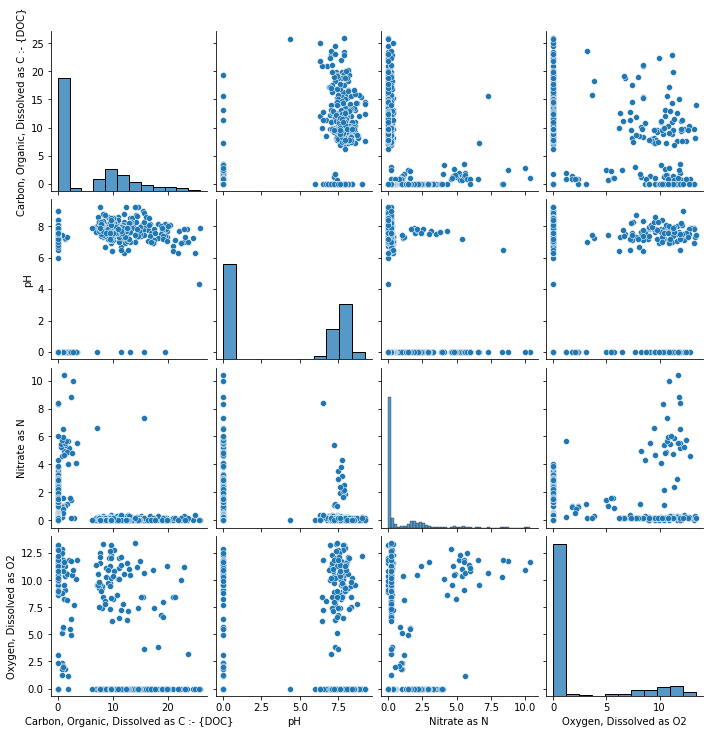

In [23]:
sns.pairplot(concat, dropna = True)

In [33]:
pd.DataFrame.describe(concat)

,"Carbon, Organic, Dissolved as C :- {DOC}",pH,Nitrate as N,"Oxygen, Dissolved as O2"
count,689.000000,689.000000,689.000000,689.000000
mean,5.044548,3.885658,0.769348,2.014855
std,6.584705,3.868961,1.462180,4.086574
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.300000,0.190500,0.000000
75%,9.980000,7.730000,1.006500,0.000000
max,25.850000,9.240000,10.400000,13.400000


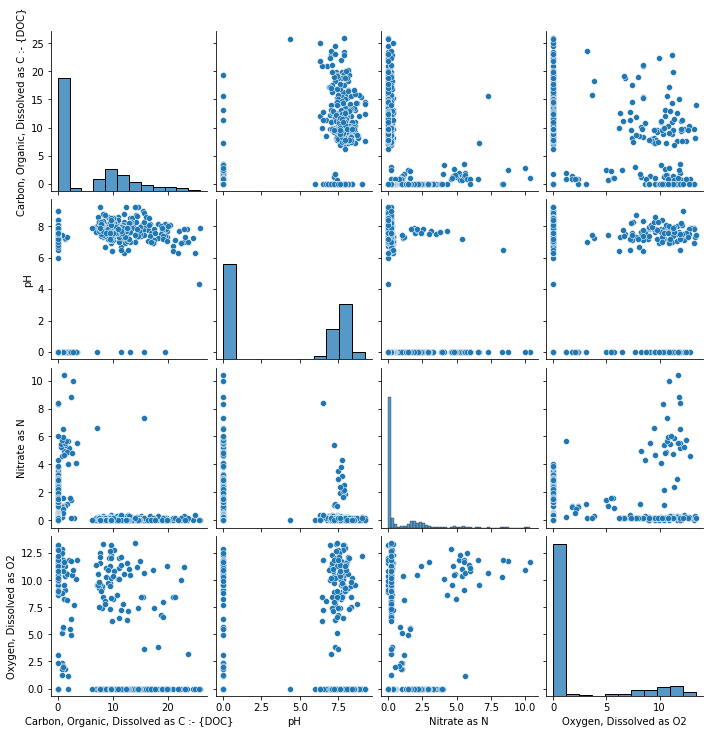

In [27]:
concat11 = pd.DataFrame(concat)
concat12= concat11.loc[~(concat11==0).all(axis=1)]


sns.pairplot(concat12)

<AxesSubplot:ylabel='Count'>

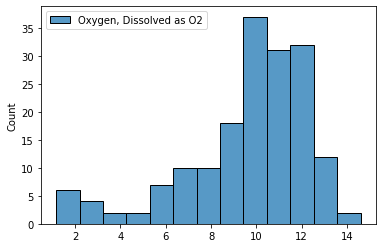

In [35]:
o21 = pd.DataFrame(o2)
o2no0= o21.loc[~(o21==0).all(axis=1)]

o2no0
sns.histplot(o2no0)

<AxesSubplot:ylabel='Count'>

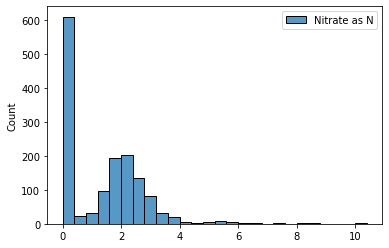

In [38]:
nitrate1 = pd.DataFrame(nitrate)
#nitrateno0= nitrate1.loc[~(nitrate1==0).all(axis=1)]

#nitrateno0
sns.histplot(nitrate1)

<AxesSubplot:ylabel='Count'>

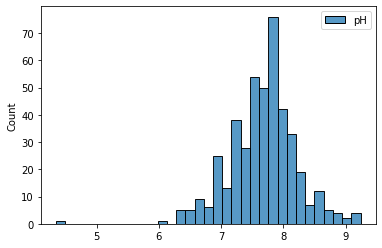

In [36]:
pH1 = pd.DataFrame(pH)
pHno0= pH1.loc[~(pH1==0).all(axis=1)]

pHno0
sns.histplot(pHno0)